In [1]:
# Add in the neccesary libraries and depedencies
# First precompile takes more time -> Julia creates a underlying type-structure so that it can exploit the JIT feature
using Plots
using Makie
using GraphMakie.NetworkLayout
using CairoMakie
using Tenet
using TensorOperations
using LinearAlgebra
using Graphs
using GraphPlot
using EinExprs
using Combinatorics
using LaTeXStrings
Makie.inline!(true)
include("julia_functions.jl")



Trivertex_classical_ising_partition_function (generic function with 2 methods)

edges g = 29
Visualisation


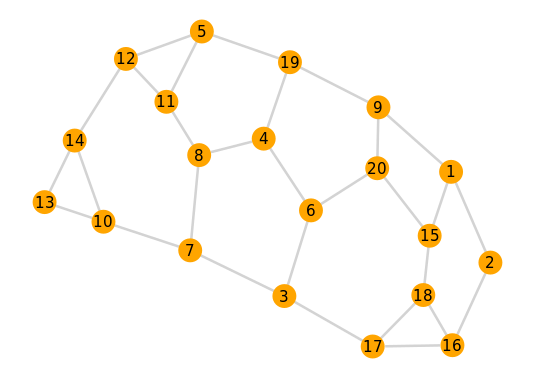

In [2]:
function generate_toy_model_graph_n20()
    
    # Generate a toy model to discuss in the results.
    g = SimpleGraph(20)
    add_edge!(g, (1,2))
    add_edge!(g, (1,4))
    add_edge!(g, (1,7))
    add_edge!(g, (4,9))
    add_edge!(g, (7,9))
    add_edge!(g, (2,3))
    add_edge!(g, (3,5))
    add_edge!(g, (3, 8))
    add_edge!(g, (7,8))
    add_edge!(g, (5,8))
    add_edge!(g, (5,10))
    add_edge!(g, (10,12))
    add_edge!(g, (10, 11))
    add_edge!(g, (9, 11))
    add_edge!(g, (4,6))
    add_edge!(g, (6,13))
    add_edge!(g, (11,13))
    add_edge!(g, (12,15))
    add_edge!(g, (12,16))
    add_edge!(g, (16,18))
    add_edge!(g, (18,20))
    add_edge!(g, (6,14))
    add_edge!(g, (14,17))
    add_edge!(g, (17,19))
    add_edge!(g, (19,20))
    add_edge!(g, (13,15))
    add_edge!(g, (16,20))
    add_edge!(g, (14,19))
    add_edge!(g, (15,17))

    #Planar representation
    locs_x =     [-4, -4, -4, -3, -3, -2, -2, -2, -1, -1, 0, 0, 1, 1, 2, 2, 3, 3, 4 ,4]   
    locs_y = -1*[2, 0, -3, 3, -4, 4, 1, -1, 2, -2, 0, -2, 2, 4, 0, -3, 2, -4, 3, 0]
    return g
end


g = generate_toy_model_graph_n20()
println("edges g = ", length(edges(g)))
TN = fill_with_random(g, 4, false, true)
g, tv_map, ie_map, weighted_edge_list, ei_map = extract_graph_representation(TN)
locs_x = [0.8235890524005085, 1.0, 0.07580751318974355, -0.017032037929692323, -0.2944683465563266, 0.19505501947920223, -0.34666814155572356, -0.30642007335610566, 0.4977523253682399, -0.7358328318661933, -0.4535100245888959, -0.6351469771061515, -1.0, -0.8649522531330216, 0.7274677388545647, 0.8296686177085972, 0.4719036541802202, 0.698920176497434, 0.10082819193961834, 0.49215115665455755]
locs_y = [-0.10897958507558192, 0.46721962406333617, 0.6797683283018006, -0.3196512600723005, -1.0, 0.13569820340952843, 0.38946479275835033, -0.2152231239505723, -0.5186006246689268, 0.20782072859317902, -0.55361343309079, -0.8258232353023699, 0.08322844321138567, -0.30754574543717594, 0.29675288939110867, 0.9916952245291406, 1.0, 0.6732513753667592, -0.8050366612343887, -0.13189261036750358]
println("Visualisation")
display(gplot(g, locs_x, locs_y, nodelabel=[node for node in 1:nv(g)], nodefillc= colorant"orange"))

In [3]:
L = laplacian_spectrum(g)
nr_trees = 1
for i in 2:length(L)
    nr_trees = nr_trees*L[i]
end

println((1800/(nr_trees/20)))

0.002228856509932634
